# Rezolvarea sistemelor liniare determinate. Eliminarea Gaussiana cu pivotare partiala.



**Tema:** Rezolvarea numerica a *sistemelor liniare inferior si superior triunghiulare* prin metode de substitutie directa precum si rezolvarea sistemelor liniare determinate dense prin *metode de transformare* cum este eliminarea gaussiana cu diferite strategii de  pivotare.

## Preliminarii

Un sistem de n ecuații liniare cu $n$ necunoscute, scris în formă matriceala:
\begin{align}
A x = b && (1)
\end{align}

unde matricea $A=\left(a_{i j}\right)_{i=1: m, j=1: n} \in \mathbb{R}^{n \times n}$ şi vectorul $b=\left(b_i\right)_{i=1: n} \in \mathbb{R}^n$ sunt date, iar $x=\left(x_j\right)_{j=1: n} \in \mathbb{R}^n$ este vectorul necunoscutelor, se numeşte **sistem liniar determinat**.

Sistemul (1) admite a soluţie unică pentru toţi $b \in \mathbb{R}^n$ **dacă şi numai dacă matricea $A$ este nesingulară, i.e. inversabilă**. Într-un astfel de caz unica soluţie a sistemului (2.1) se scrie

\begin{align}
x=A^{-1} b . && (2)
\end{align}


Trebuie să subliniem că formula (2) <font color="red">*NU este recomandată*</font> pentru calculul soluţiei sistemului $A x=b$, după cum nu sunt recomandate şi alte metode "bine cunoscute" cum este regula lui Cramer etc.

Vom prezenta o categorie de <font color="green">*metode fiabile şi eficiente de rezolvare a sistemelor determinate* </font> şi anume aşa numitele **metode directe**, bazate pe reducerea, printr-o secvenţă finită de <font color="green">*transformări elementare* </font>, la rezolvarea, prin simplă substituţie, a unuia sau a două sisteme triunghiulare. În această categorie intră metode precum
*   eliminarea gaussiană
*   factorizărea LU

## Rezolvarea sistemelor triunghiulare


*   O matrice $L \in \mathbb{R}^{n \times n}$, cu $l_{i j}=0$ pentru toţi $i<j$ se numeşte *inferior triunghiulară*.
*   O matrice $U \in \mathbb{R}^{n \times n}$, cu $u_{i j}=0$ pentru toţi $i>j$ se numeşte *superior triunghiulară*.


 Sistemul $A x=b$ se numeşte inferior (superior) triunghiular dacă matricea $A$ este inferior (superior) triunghiulară. O matrice triunghiulară este nesingulară dacă şi numai dacă toate elementele sale diagonale sunt nenule.

Algoritmii pentru rezolvarea sistemelor triunghiulare sunt foarte simpli, întrucât necunoscutele pot fi calculate, într-o ordine definită, prin substituţie numerică directă.

Considerăm un sistem **superior triunghiular nesingular**:

\begin{align}
U x=b && (3)
\end{align}

unde $U$ este o matrice superior triunghiulară de ordinul $n$, cu $u_{i i} \neq 0, i=1: n$, şi $b \in \mathbb{R}^n$, observăm că ultima ecuaţie este

$$
u_{n n} x_n=b_n
$$

din care avem

\begin{align}
x_n=b_n / u_{n n}  && (4).
\end{align}


Mai mult, dacă $x_n, x_{n-1}, \ldots, x_{i+1}$, sunt deja calculate, atunci, din ecuaţia $i$

$$
u_{i i} x_i+\sum_{j=i+1}^n u_{i j} x_j=b_i
$$

obţinem

\begin{align}
x_i=\left(b_i-\sum_{j=i+1}^n u_{i j} x_j\right) / u_{i i} && (5) .
\end{align}


Din formulele (4) şi (5), care definesc aşa numita substituţie înapoi, obţinem următorul algoritm.

__________________________________________________________________________

**Algoritm 2.2 (UTRIS/S_SUP_TR)** (Dată o matrice $U \in \mathbb{R}^{n \times n}$, superior triunghiulară, nesingulară şi un vector $b \in \mathbb{R}^n$, acest algoritm calculează soluţia $x$ a sistemului $U x=b$.)
1. pentru $i=n:-1: 1$
1. $s \leftarrow b_i$
2. pentru $j=i+1: n$
1. $s \leftarrow s-u_{i j} x_j$
3. $x_i \leftarrow s / u_{i i}$
__________________________________________________________________________
Acest algoritm necesită <font color="red"> $N_{UTRIS} \approx n^2$ flopi şi $M_{UTRIS} \approx n^2 / 2$  locaţii de memorie </font>. Dacă vectorul $b$ nu mai este necesar, soluţia $x$ poate suprascrie vectorul $b$ pe măsură ce este calculată.

### Ex. 1 (0.5p): Creati in Python functia UTRIS care rezolva sisteme superior triunghiulare conform algoritmului prezentat mai sus.

In [16]:
import numpy as np

def UTRIS(U, b):
  n = U.shape[0]
  x = b.copy()

  for i in range(n - 1, -1, -1):
    s = x[i]

    for j in range(i + 1, n):
      s = s - U[i, j] * x[j]
        
    x[i] = s / U[i, i]
  
  return x

In [17]:
# Verificare UTRIS
U = np.array([[4.0, 2.0, -1.0],
              [0.0, 5.0, 3.0],
              [0.0, 0.0, 1.0]])

x_true = np.array([2.0, 1.0, 3.0])
b = np.dot(U, x_true)

x = UTRIS(U, b)

print("U:")
print(U)
print("\nb:")
print(b)
print("\nx cu UTRIS:")
print(x)

x_check = np.linalg.solve(U, b)
print("\nSolutia verificată:")
print(x_check)

U:
[[ 4.  2. -1.]
 [ 0.  5.  3.]
 [ 0.  0.  1.]]

b:
[ 7. 14.  3.]

x cu UTRIS:
[2. 1. 3.]

Solutia verificată:
[2. 1. 3.]


## Eliminarea Gaussiana


Eliminarea gaussiană este o tehnică pentru reducerea sistemului $A x=b$ la un sistem superior triunghiular echivalent

$$
M A x=M b,
$$

i.e. cu matricea $U=M A$ superior triunghiulară. Matricea de transformare $M$ este o matrice inferior triunghiulară unitară obţinută ca o secvență (produs) de transformări (matrice) inferior triunghiulare elementare

$$
M=M_{n-1} M_{n-2} \ldots M_1
$$


O matrice inferior triunghiulară elementară (ITE) de ordin $n$ şi indice $k$ este o matrice de forma

$$
M_k=I_n-m_k e_k^T, \quad m_k=[\underbrace{0 \ldots 0}_{k} \, \, \, \,\, \mu_{k+1, k} \,\, \ldots \,\, \mu_{n k}]^T .
$$


**Triangularizarea de mai sus există dacă toate submatricele lider principale $A^{[k]}=$ $A(1: k, 1: k)$ sunt nesingulare**, iar procesul de triangularizare are loc conform schemei de calcul
1. pentru $k=1: n-1$
1. Se determină matricea ITE $M_k$, i.e. scalarii $\mu_{i k}, i=k+1: n$, astfel încât $\left(M_k A\right)_{i k}=0, i=k+1: n$
2. $A \leftarrow M_k A$

Scalarii $\mu_{i k}$, numiţi multiplicatori gaussieni, care asigură satisfacerea condiţiei de la 1.1 au expresia

$$
\mu_{i k}=a_{i k} / a_{k k}, \quad i=k+1: n
$$

şi pot fi memoraţi în locul zerourilor create. Operaţia $A \leftarrow M_k A$ se execută eficient dacă ținem seama că primele $k-1$ coloane ale lui $A$ nu sunt afectate, coloana $k$ este afectată într-un mod cunoscut, iar coloanele $a_j, j \in k+1: n$ suferă transformarea

$$
\left(M_k a_j\right)_i=\left(\left(I_n-m_k e_k^T\right) a_j\right)_i=\left(a_j-m_k a_{k j}\right)_i=a_{i j}-\mu_{i k} a_{k j}, \quad i=k+1: n
$$

<font color="red">**Observatie**: *Nesingularitatea submatricelor lider principale ale matricei A nu este o condiție necesară pentru existența și unicitatea soluției unui sistem de forma $Ax = b$. Pentru a elimina această condiție vom introduce **pivotarea**.* </font>


## Strategii de Pivotare

**Singularitatea submatricelor lider principale $A^{[k]}$ este echivalentă cu anularea elementului $a_{k k}$, numit pivot**, la pasul $k$ al algoritmului de Eliminare Gaussiana . **Ca urmare, calculul multiplicatorilor gaussieni nu se poate face**. Într-un astfel de caz, este **necesară aducerea pe poziţia pivotului a unui element nenul**, preferabil de modul cât mai mare, prin permutare de linii şi/sau coloane.

Întrucât **interschimbarea** a două linii ale unei matrice **este echivalentă** cu premultiplicarea acelei matrice cu o **matrice de permutare** elementară iar interschimbarea a două coloane este echivalentă cu postmultiplicarea matricei cu o matrice de permutare elementară, întregul proces de "pivotare" poate fi descris în termeni matriceali într-unul din două următoare moduri.

### Pivotarea partiala

Pivotarea parţială are loc prin permutarea numai a liniilor. La pasul $k$ al algoritmului G se aduce în poziţia $(k, k)$ a pivotului cel mai mare element în modul dintre elementele subdiagonale din coloana $k$, fie acesta $a_{i_k k} \neq 0$, prin permutarea liniilor $k$ şi $i_k$. Acest lucru este echivalent cu premultiplicarea matricei $A$ cu matricea de permutare elementară $P_{i_k} k \stackrel{\text { not }}{=} P_k$, astfel încât pasul $k$ realizează

$$
A \leftarrow M_k P_k A,
$$

iar întregul algoritm realizează triangularizarea matricii $A$ prin secvenţa

$$
A \leftarrow U=M_{n-1} P_{n-1} M_{n-2} P_{n-2} \ldots M_1 P_1 A
$$


Algoritmul corespunzător este dat mai jos.


__________________________________________________________________________
**Algoritm 2.4 (GPP - eliminarea gaussiană cu pivotare parţială)** (Dată o matrice $A \in \mathbb{R}^{n \times n}$, algoritmul suprascrie triunghiul superior al lui $A$ cu matricea superior triunghiulară $U=M_{n-1} P_{n-1} \ldots M_1 P_1 A$. Triunghiul strict inferior al lui $A$ este suprascris de multiplicatorii gaussieni $\mu_{i k}$ ce definesc matricele ITE $M_k, k=1: n-1$, iar întregii $i_k$, definind permutările de linii, sunt memoraţi într-un vector $p$, astfel încât $p(k)=$ $i_k$, pentru $k=1: n-1$.)


**1. pentru $k=1: n-1$**
   1. Se determină primul $i_k \in k: n$ astfel încât $\left|a_{i_k k}\right|=\max _{i=k: n}\left|a_{i k}\right|.$
   2. $p(k) \leftarrow i_k$
   3. pentru $j=k: n$
      1. $ a_{k j} \leftrightarrow a_{i_k j} $
   4. pentru $i=k+1: n$
      1. $a_{i k} \leftarrow \mu_{i k}=a_{i k} / a_{k k}$
   5. pentru $i=k+1: n$
      1. pentru $j=k+1: n$
         1. $a_{i j} \leftarrow a_{i j}-\mu_{i k} a_{k j}$
____________________________________________________________________________

<font color="red"> Complexitatea algoritmului este $\mathcal{O}(\frac{2n^3}{3})$.</font>


## Rezolvarea sistemelor liniare cu GPP



**Algoritm 2.6 (SL_GPP - Rezolvarea sistemelor liniare cu GPP)** (Dată o matrice nesingulară $A \in \mathbb{R}^{n \times n}$ şi un vector $b \in \mathbb{R}^n$, acest algoritm calculează soluţia $x \in \mathbb{R}^n$ a sistemului liniar $A x=b$, folosind eliminarea gaussiană cu pivotare parţială.)
  
  1. $[M, U, p]=\operatorname{GPP}(A)$
  2.  pentru $k=1: n-1$       *% Aplicarea matricelor ITE si de Permutare asupra lui $b$*
      1. $b_k \leftrightarrow b_{p(k)}$
      2. pentru $i=k+1: n$
           1. $ b_i \leftarrow b_i-\mu_{i k} b_k $
  3. $x=$ UTRIS $(U, b)$




## Aplicatie: Gaseste sensul mesajului!

### Introducere

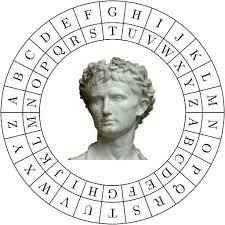
 Istoric, **criptografia** – știința codificării și decodificării informației – a fost folosită în principal în scopuri militare. Probabil îți amintești de mașina ENIGMA, folosită de germani în Al Doilea Război Mondial pentru a comunica în secret. Astăzi, criptarea a devenit esențială pentru *comunicarea electronică sigură*, cum ar fi tranzacțiile cu carduri de credit pe internet, confidențialitatea e-mailurilor etc.

Una dintre cele mai simple si raspandite criptari este *Cifrul lui Cezar*, denumit si *Deplasarea Cezariană*. Acesta presupune ca fiecare literă dintr-un text sa fie înlocuită cu o altă literă, aflată la un număr fix de poziții mai în față în alfabet.

> *De exemplu: Dacă folosim o deplasare de +3, atunci A devine D, B devine E, C devine F etc.*


**Terminologie:**

*   **Criptare:**  Procesul de transformare a datelor într-un format inaccesibil fără o **cheie secretă**.
*    **Decriptare:** Procesul de transformare a datelor criptate înapoi în forma lor originală, folosind o **cheie secretă**.
*    **Cheie:** Este o informație secretă (un șir de caractere, număr, sau cod) folosită pentru a cripta sau decripta un mesaj.
*   **Cifru:** Este un algoritm concret folosit pentru a transforma un mesaj clar într-un mesaj criptat (și invers, prin decriptare). Este parte dintr-un sistem criptografic, dar nu include neapărat tot ansamblul (ex: generarea cheilor).


---



### Ex. 2 (2p): Descifrati mesajul primit la laborator folosind cheia furnizata si utilizand algoritmul de eliminare gausiana cu pivotare partiala adaptat.

In [ ]:
def GPP(A):
  # Algoritmul 2.4 (GPP - eliminarea gaussiană cu pivotare parţială)

  A = A.copy()
  n = A.shape[0]
  p = np.arange(n)

  # 1. pentru k=1: n-1
  for k in range(n - 1):
    # 1. Se determină primul i_k in k:n astfel încât |a_ik_k| = max_{i=k:n} |a_ik|
    pivot_row_index = k
    max_value = abs(A[k, k])
    for i in range(k + 1, n):
      if abs(A[i, k]) > max_value:
        max_value = abs(A[i, k])
        pivot_row_index = i

    # 2. p(k) <- i_k
    p[k] = pivot_row_index

    # 3. pentru j=k: n, a_kj <-> a_i_k_j
    for j in range(k, n):
      A[k, j], A[pivot_row_index, j] = A[pivot_row_index, j], A[k, j]

    # 4. pentru i=k+1: n
    for i in range(k + 1, n):
      # a_ik <- mu_ik = a_ik / a_kk
      A[i, k] = A[i, k] / A[k, k]
        
    # 5. pentru i=k+1: n
    for i in range(k + 1, n):
      # pentru j=k+1: n
      for j in range(k + 1, n):
        # a_ij <- a_ij - mu_ik * a_kj
        mu_ik = A[i, k]
        A[i, j] = A[i, j] - mu_ik * A[k, j]
              
  return A, p

In [47]:
def SL_GPP(A, b):
  # Algoritmul 2.6 (SL_GPP - Rezolvarea sistemelor liniare cu GPP)

  A = A.copy()
  b = b.copy()
  n = A.shape[0]

  # 1. [M, U, p]=GPP(A)
  U, p = GPP(A)

  # 2. pentru k=1: n-1
  for k in range(n - 1):
    # 2.1 b_k <-> b_p(k)
    b[k], b[p[k]] = b[p[k]], b[k]

    # 2.2 pentru i=k+1: n
    for i in range(k + 1, n):
      # 2.2.1 b_i <- b_i - mu_ik * b_k
      mu_ik = U[i, k]
      b[i] = b[i] - mu_ik * b[k]

  # 3. x = UTRIS(U, b)
  x = UTRIS(U, b)

  return x

In [50]:
# Verificare SL_GPP
U = np.array([[4.0, 2.0, -1.0],
              [0.0, 5.0, 3.0],
              [0.0, 0.0, 1.0]])

x_true = np.array([2.0, 1.0, 3.0])
b = np.dot(U, x_true)
x = SL_GPP(U, b)

print("U:")
print(U)
print("\nb:")
print(b)
print("\nx cu SL_GPP:")
print(x)

x_np = np.linalg.solve(U, b)
print("\nx cu np:")
print(x_np)

U:
[[ 4.  2. -1.]
 [ 0.  5.  3.]
 [ 0.  0.  1.]]

b:
[ 7. 14.  3.]

x cu SL_GPP:
[2. 1. 3.]

x cu np:
[2. 1. 3.]


In [53]:
b = np.load('msg_odd.npy')
A = np.load('key_odd.npy')

x = SL_GPP(A, b)

print(x)

[ 71.  97. 117. 115. 115.]


### Ex. 3 (0.5p): Utilizați funcțiile de conversie puse la dispoziție de limbajul Python (de exemplu, `int()`, `chr()`, etc.) pentru a transpune valorile obținute în cadrul exercițiului anterior în caractere corespunzătoare.

In [56]:
for i in x:
  print(chr(int(i)), end=" ")

F a u s r 